**M-07 Pengembang Machine Learning dan Front-End**

Hanif Al Irsyad

Universitas Amikom Yogyakarta

Sleman,Yogyakarta

In [2]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!gdown --id 1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj
To: /content/bbc-text.csv
100% 5.06M/5.06M [00:00<00:00, 335MB/s]


In [4]:
df = pd.read_csv('/content/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [6]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis=1)
df = df_new.drop(columns='category')
df.head(10)

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
5,howard hits back at mongrel jibe michael howar...,0,0,1,0,0
6,blair prepares to name poll date tony blair is...,0,0,1,0,0
7,henman hopes ended in dubai third seed tim hen...,0,0,0,1,0
8,wilkinson fit to face edinburgh england captai...,0,0,0,1,0
9,last star wars not for children the sixth an...,0,1,0,0,0


In [12]:
df2 = df_new['text'].values
label = df_new[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df2, label,test_size = 0.2,shuffle=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [22]:
vocab_size = 5000
output_dim = 64
oov_token = "<OOV>"
max_len = 200
trunc_type = "post"

In [17]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(x_train)

index_kata = tokenizer.word_index

sekuens_latih = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)
padded_latih = pad_sequences(sekuens_latih, maxlen=max_len, truncating=trunc_type)
padded_test = pad_sequences(sekuens_test, maxlen=max_len, truncating=trunc_type)

print(padded_test.shape)

(445, 200)


In [19]:
padded_latih

array([[ 144,  398,    9, ..., 4390,    9, 2052],
       [2572,  616, 1025, ...,    1,   19, 1534],
       [ 456,  433,   91, ..., 1488,    6,   94],
       ...,
       [ 148,   63,    9, ...,    1,    2, 3764],
       [ 147,   99,    8, ...,   24,   32,  147],
       [ 362, 3278,    3, ...,    6, 2779, 1056]], dtype=int32)

In [20]:
padded_test

array([[   1, 4463, 3255, ..., 1128,    7,    1],
       [  77,  985,    9, ...,    1,    2,    1],
       [2934, 3942,    1, ...,  756, 2086, 1461],
       ...,
       [   1,    1, 1108, ...,  273,    9,    2],
       [1039, 4604,    7, ...,    2,  252,  122],
       [  49,  211,  699, ...,   23,  558,   42]], dtype=int32)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 435,973
Trainable params: 435,973
Non-trainable params: 0
_________________________________________________________________


In [25]:
class Callbacknlp(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.85):
            print("\nReached %2.2f%% accuracy, training has been stop" %(logs.get('accuracy')*100))
            self.model.stop_training = True

callbacks = Callbacknlp()

In [26]:
num_epochs = 50

history = model.fit(padded_latih, y_train, epochs=num_epochs, validation_data=(padded_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
56/56 - 11s - loss: 1.5892 - accuracy: 0.2584 - val_loss: 1.5061 - val_accuracy: 0.3506 - 11s/epoch - 188ms/step
Epoch 2/50
56/56 - 9s - loss: 1.2536 - accuracy: 0.4337 - val_loss: 1.1884 - val_accuracy: 0.6180 - 9s/epoch - 153ms/step
Epoch 3/50
56/56 - 9s - loss: 0.9730 - accuracy: 0.5753 - val_loss: 3.9334 - val_accuracy: 0.4809 - 9s/epoch - 153ms/step
Epoch 4/50
56/56 - 9s - loss: 1.5363 - accuracy: 0.4725 - val_loss: 1.0507 - val_accuracy: 0.6000 - 9s/epoch - 158ms/step
Epoch 5/50
56/56 - 9s - loss: 0.7466 - accuracy: 0.6916 - val_loss: 0.6292 - val_accuracy: 0.7865 - 9s/epoch - 165ms/step
Epoch 6/50
56/56 - 9s - loss: 0.4362 - accuracy: 0.8466 - val_loss: 0.6843 - val_accuracy: 0.7978 - 9s/epoch - 152ms/step
Epoch 7/50

Reached 94.55% accuracy, training has been stop
56/56 - 8s - loss: 0.2009 - accuracy: 0.9455 - val_loss: 0.3945 - val_accuracy: 0.8876 - 8s/epoch - 151ms/step


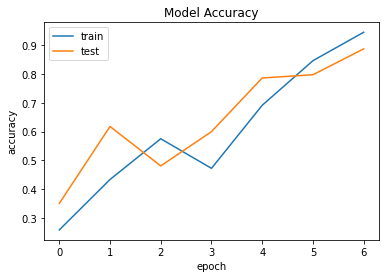

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

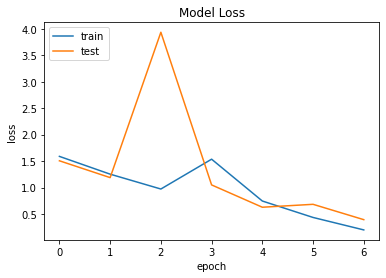

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()